In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [4]:
display(stud.head(10))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [89]:
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


In [100]:
print(f'There are {stud.school.isnull().any().sum()} columns in stud dataset with missing values.')

There are 0 columns in stud dataset with missing values.


In [92]:
pd.DataFrame(stud.sex.value_counts())

,sex
F,208
M,187


In [99]:
print(f'There are {stud.sex.isnull().any().sum()} columns in stud dataset with missing values.')

There are 0 columns in stud dataset with missing values.


In [101]:
pd.DataFrame(stud.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [102]:
print(f'There are {stud.age.isnull().any().sum()} columns in stud dataset with missing values.')

There are 0 columns in stud dataset with missing values.


In [94]:
pd.DataFrame(stud.address.value_counts())

,address
U,295
R,83


In [98]:
print(f'There are {stud.address.isnull().any().sum()} columns in stud dataset with missing values.')

There are 1 columns in stud dataset with missing values.


In [103]:
pd.DataFrame(stud.famsize.value_counts())

,famsize
GT3,261
LE3,107


In [104]:
print(f'There are {stud.famsize.isnull().any().sum()} columns in stud dataset with missing values.')

There are 1 columns in stud dataset with missing values.


In [105]:
pd.DataFrame(stud.Pstatus.value_counts()) 

,Pstatus
T,314
A,36


In [106]:
print(f'There are {stud.Pstatus.isnull().any().sum()} columns in stud dataset with missing values.')

There are 1 columns in stud dataset with missing values.


In [108]:
pd.DataFrame(stud.Medu.value_counts()) 

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


In [109]:
print(f'There are {stud.Medu.isnull().any().sum()} columns in stud dataset with missing values.')

There are 1 columns in stud dataset with missing values.


In [110]:
pd.DataFrame(stud.Fedu.value_counts()) 

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [111]:
print(f'There are {stud.Fedu.isnull().any().sum()} columns in stud dataset with missing values.')

There are 1 columns in stud dataset with missing values.


In [112]:
pd.DataFrame(stud.Mjob.value_counts()) 

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


In [117]:
print(f'There are {stud.Mjob.isnull().any().sum()} columns in stud dataset with missing values.')

There are 1 columns in stud dataset with missing values.


In [118]:
pd.DataFrame(stud.Fjob.value_counts()) 

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


In [119]:
print(f'There are {stud.Fjob.isnull().any().sum()} columns in stud dataset with missing values.')

There are 1 columns in stud dataset with missing values.


In [129]:
pd.DataFrame(stud.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


In [65]:
pd.DataFrame(stud.guardian.value_counts())

,guardian
mother,250
father,86
other,28


In [66]:
pd.DataFrame(stud.traveltime.value_counts())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


In [68]:
pd.DataFrame(stud.studytime.value_counts())

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


In [69]:
pd.DataFrame(stud.schoolsup.value_counts())

,schoolsup
no,335
yes,51


In [70]:
pd.DataFrame(stud.famsup.value_counts())

,famsup
yes,219
no,137


In [71]:
pd.DataFrame(stud.paid .value_counts())

,paid
no,200
yes,155


In [73]:
pd.DataFrame(stud.activities.value_counts())

,activities
yes,195
no,186


In [76]:
pd.DataFrame(stud.nursery.value_counts())

,nursery
yes,300
no,79


In [79]:
pd.DataFrame(stud['studytime, granular'].value_counts())

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


In [80]:
pd.DataFrame(stud.higher.value_counts())

,higher
yes,356
no,19


In [81]:
pd.DataFrame(stud.internet.value_counts())

,internet
yes,305
no,56


In [82]:
pd.DataFrame(stud.romantic.value_counts())

,romantic
no,240
yes,124


In [83]:
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


In [84]:
pd.DataFrame(stud.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


In [85]:
pd.DataFrame(stud.goout.value_counts())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


In [86]:
pd.DataFrame(stud.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


In [87]:
pd.DataFrame(stud.absences .value_counts())

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


In [88]:
pd.DataFrame(stud.score.value_counts())

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


In [ ]:
#ниже запрос как это сделать быстрее

In [141]:
for name in stud.columns:
    print(stud[name].value_counts())

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
U    295
R     83
Name: address, dtype: int64
GT3    261
LE3    107
Name: famsize, dtype: int64
T    314
A     36
Name: Pstatus, dtype: int64
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64
other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64
other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64
mother    250
father     86
other      28
Name: guardian, dtype: int64
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64
2.0    194
1.0    103
3.0     64


In [171]:
#здесь видно что нулевых значений нет только в трех полях
for name in stud.columns:
    print(f'There are {stud[name].isnull().sum()} {name} in stud dataset with missing values.')

There are 0 school in stud dataset with missing values.
There are 0 sex in stud dataset with missing values.
There are 0 age in stud dataset with missing values.
There are 17 address in stud dataset with missing values.
There are 27 famsize in stud dataset with missing values.
There are 45 Pstatus in stud dataset with missing values.
There are 3 Medu in stud dataset with missing values.
There are 24 Fedu in stud dataset with missing values.
There are 19 Mjob in stud dataset with missing values.
There are 36 Fjob in stud dataset with missing values.
There are 17 reason in stud dataset with missing values.
There are 31 guardian in stud dataset with missing values.
There are 28 traveltime in stud dataset with missing values.
There are 7 studytime in stud dataset with missing values.
There are 22 failures in stud dataset with missing values.
There are 9 schoolsup in stud dataset with missing values.
There are 39 famsup in stud dataset with missing values.
There are 40 paid in stud dataset 

In [168]:
for name in stud.columns:
    print(f'Значений, встретившихся в столбце {name} более 10 раз:' #Число 10 взято для ориентира, можно брать другое
      , (stud[name].value_counts()>10).sum())

Значений, встретившихся в столбце school более 10 раз: 2
Значений, встретившихся в столбце sex более 10 раз: 2
Значений, встретившихся в столбце age более 10 раз: 5
Значений, встретившихся в столбце address более 10 раз: 2
Значений, встретившихся в столбце famsize более 10 раз: 2
Значений, встретившихся в столбце Pstatus более 10 раз: 2
Значений, встретившихся в столбце Medu более 10 раз: 4
Значений, встретившихся в столбце Fedu более 10 раз: 4
Значений, встретившихся в столбце Mjob более 10 раз: 5
Значений, встретившихся в столбце Fjob более 10 раз: 5
Значений, встретившихся в столбце reason более 10 раз: 4
Значений, встретившихся в столбце guardian более 10 раз: 3
Значений, встретившихся в столбце traveltime более 10 раз: 3
Значений, встретившихся в столбце studytime более 10 раз: 4
Значений, встретившихся в столбце failures более 10 раз: 4
Значений, встретившихся в столбце schoolsup более 10 раз: 2
Значений, встретившихся в столбце famsup более 10 раз: 2
Значений, встретившихся в ст

In [170]:
for name in stud.columns:
    print(f'Кол-во уникальных значений {name}:' #Число уникальных значений
      , (stud[name].value_counts()).sum())

Кол-во уникальных значений school: 395
Кол-во уникальных значений sex: 395
Кол-во уникальных значений age: 395
Кол-во уникальных значений address: 378
Кол-во уникальных значений famsize: 368
Кол-во уникальных значений Pstatus: 350
Кол-во уникальных значений Medu: 392
Кол-во уникальных значений Fedu: 371
Кол-во уникальных значений Mjob: 376
Кол-во уникальных значений Fjob: 359
Кол-во уникальных значений reason: 378
Кол-во уникальных значений guardian: 364
Кол-во уникальных значений traveltime: 367
Кол-во уникальных значений studytime: 388
Кол-во уникальных значений failures: 373
Кол-во уникальных значений schoolsup: 386
Кол-во уникальных значений famsup: 356
Кол-во уникальных значений paid: 355
Кол-во уникальных значений activities: 381
Кол-во уникальных значений nursery: 379
Кол-во уникальных значений studytime, granular: 388
Кол-во уникальных значений higher: 375
Кол-во уникальных значений internet: 361
Кол-во уникальных значений romantic: 364
Кол-во уникальных значений famrel: 368
Ко

In [ ]:
# далее посмотрим статистику по каждому столбцу

In [57]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


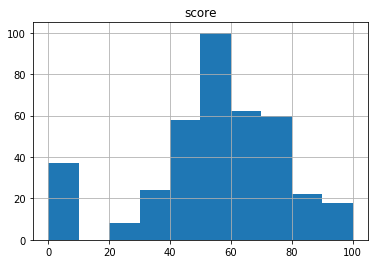

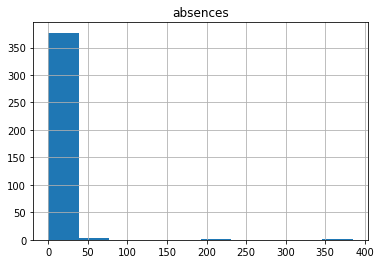

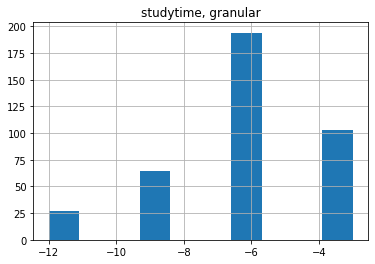

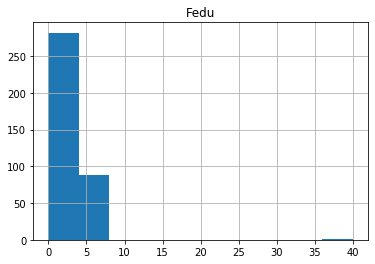

In [157]:
# посмотрев статистику хочеться повнимательнее посмотреть score, absences, 'studytime, granular','Fedu' 
#т.к разрыв между мин и макс очень большой, и ско тоже сравнительно большое -есть вероятность выбросов
cols = ['score', 'absences', 'studytime, granular','Fedu' ]
for col in cols:
    plt.figure()    
    stud[col].hist()
    plt.title(col)
    plt.show()

25-й перцентиль: 42.5, 75-й перцентиль: 70.0, IQR: 27.5,  Границы выбросов: [1.25, 111.25].


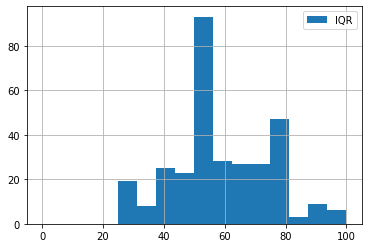

In [194]:
IQR_s = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25_s = stud.score.quantile(0.25)
perc75_s = stud.score.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25_s),
'75-й перцентиль: {},'.format(perc75_s),
"IQR: {}, ".format(IQR_s),
"Границы выбросов: [{f}, {l}].".format(f=perc25_s - 1.5*IQR_s, l=perc75_s + 1.5*IQR_s))
 
stud.score.loc[stud.score.between(
perc25_s - 1.5*IQR_s,
perc75_s + 1.5*IQR_s)].hist(bins = 16, range = (0, 100), label = 'IQR') 
 
plt.legend();

25-й перцентиль: 0.0, 75-й перцентиль: 6.0, IQR: 6.0,  Границы выбросов: [-9.0, 15.0].


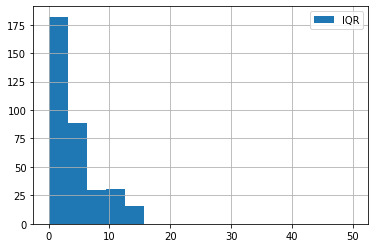

In [195]:
IQR_a = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25_a = stud.absences.quantile(0.25)
perc75_a = stud.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25_a),
'75-й перцентиль: {},'.format(perc75_a),
"IQR: {}, ".format(IQR_a),
"Границы выбросов: [{f}, {l}].".format(f=perc25_a - 1.5*IQR_a, l=perc75_a + 1.5*IQR_a))
 
stud.absences.loc[stud.absences.between(
perc25_a - 1.5*IQR_a,
perc75_a + 1.5*IQR_a)].hist(bins = 16, range = (0, 50), label = 'IQR') 
 
plt.legend();

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: -45.5,  Границы выбросов: [62.25, -71.25].


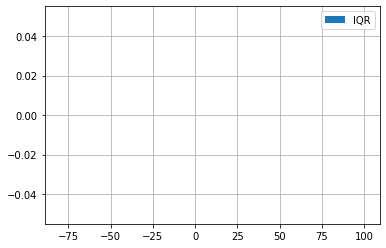

In [197]:
IQR = stud['studytime, granular'].quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud['studytime, granular'].quantile(0.25)
perc75 = stud['studytime, granular'].quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud['studytime, granular'].loc[stud['studytime, granular'].between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (-80, 100), label = 'IQR') 
 
plt.legend();

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 3.0,  Границы выбросов: [-2.5, 7.5].


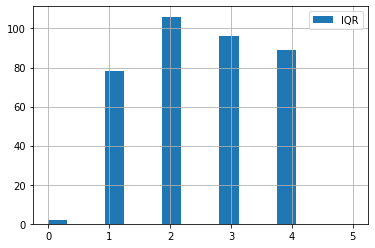

In [181]:
IQR_fedu = stud.Fedu.quantile(0.75) - stud.absences.quantile(0.25)
perc25_fedu = stud.Fedu.quantile(0.25)
perc75_fedu = stud.Fedu.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25_fedu),
'75-й перцентиль: {},'.format(perc75_fedu),
"IQR: {}, ".format(IQR_fedu),
"Границы выбросов: [{f}, {l}].".format(f=perc25_fedu - 1.5*IQR, l=perc75_fedu + 1.5*IQR))
 
stud.Fedu.loc[stud.Fedu.between(
perc25_fedu - 1.5*IQR_fedu,
perc75_fedu + 1.5*IQR_fedu)].hist(bins = 16, range = (0, 5), label = 'IQR') 
 
plt.legend();

In [179]:
# опечатка в поле Fedu (40 вместо 4)
stud['Fedu'][stud['Fedu'] == 40] = 4

/Users/elena.semushina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [198]:
# есть выбросы в 'score', 'absences'
stud = stud.loc[stud.absences.between(perc25_a - 1.5*IQR_a, perc75_a + 1.5*IQR_a)]

In [203]:
stud = stud.loc[stud.score.between(perc25_s - 1.5*IQR_s, perc75_s + 1.5*IQR_s)]

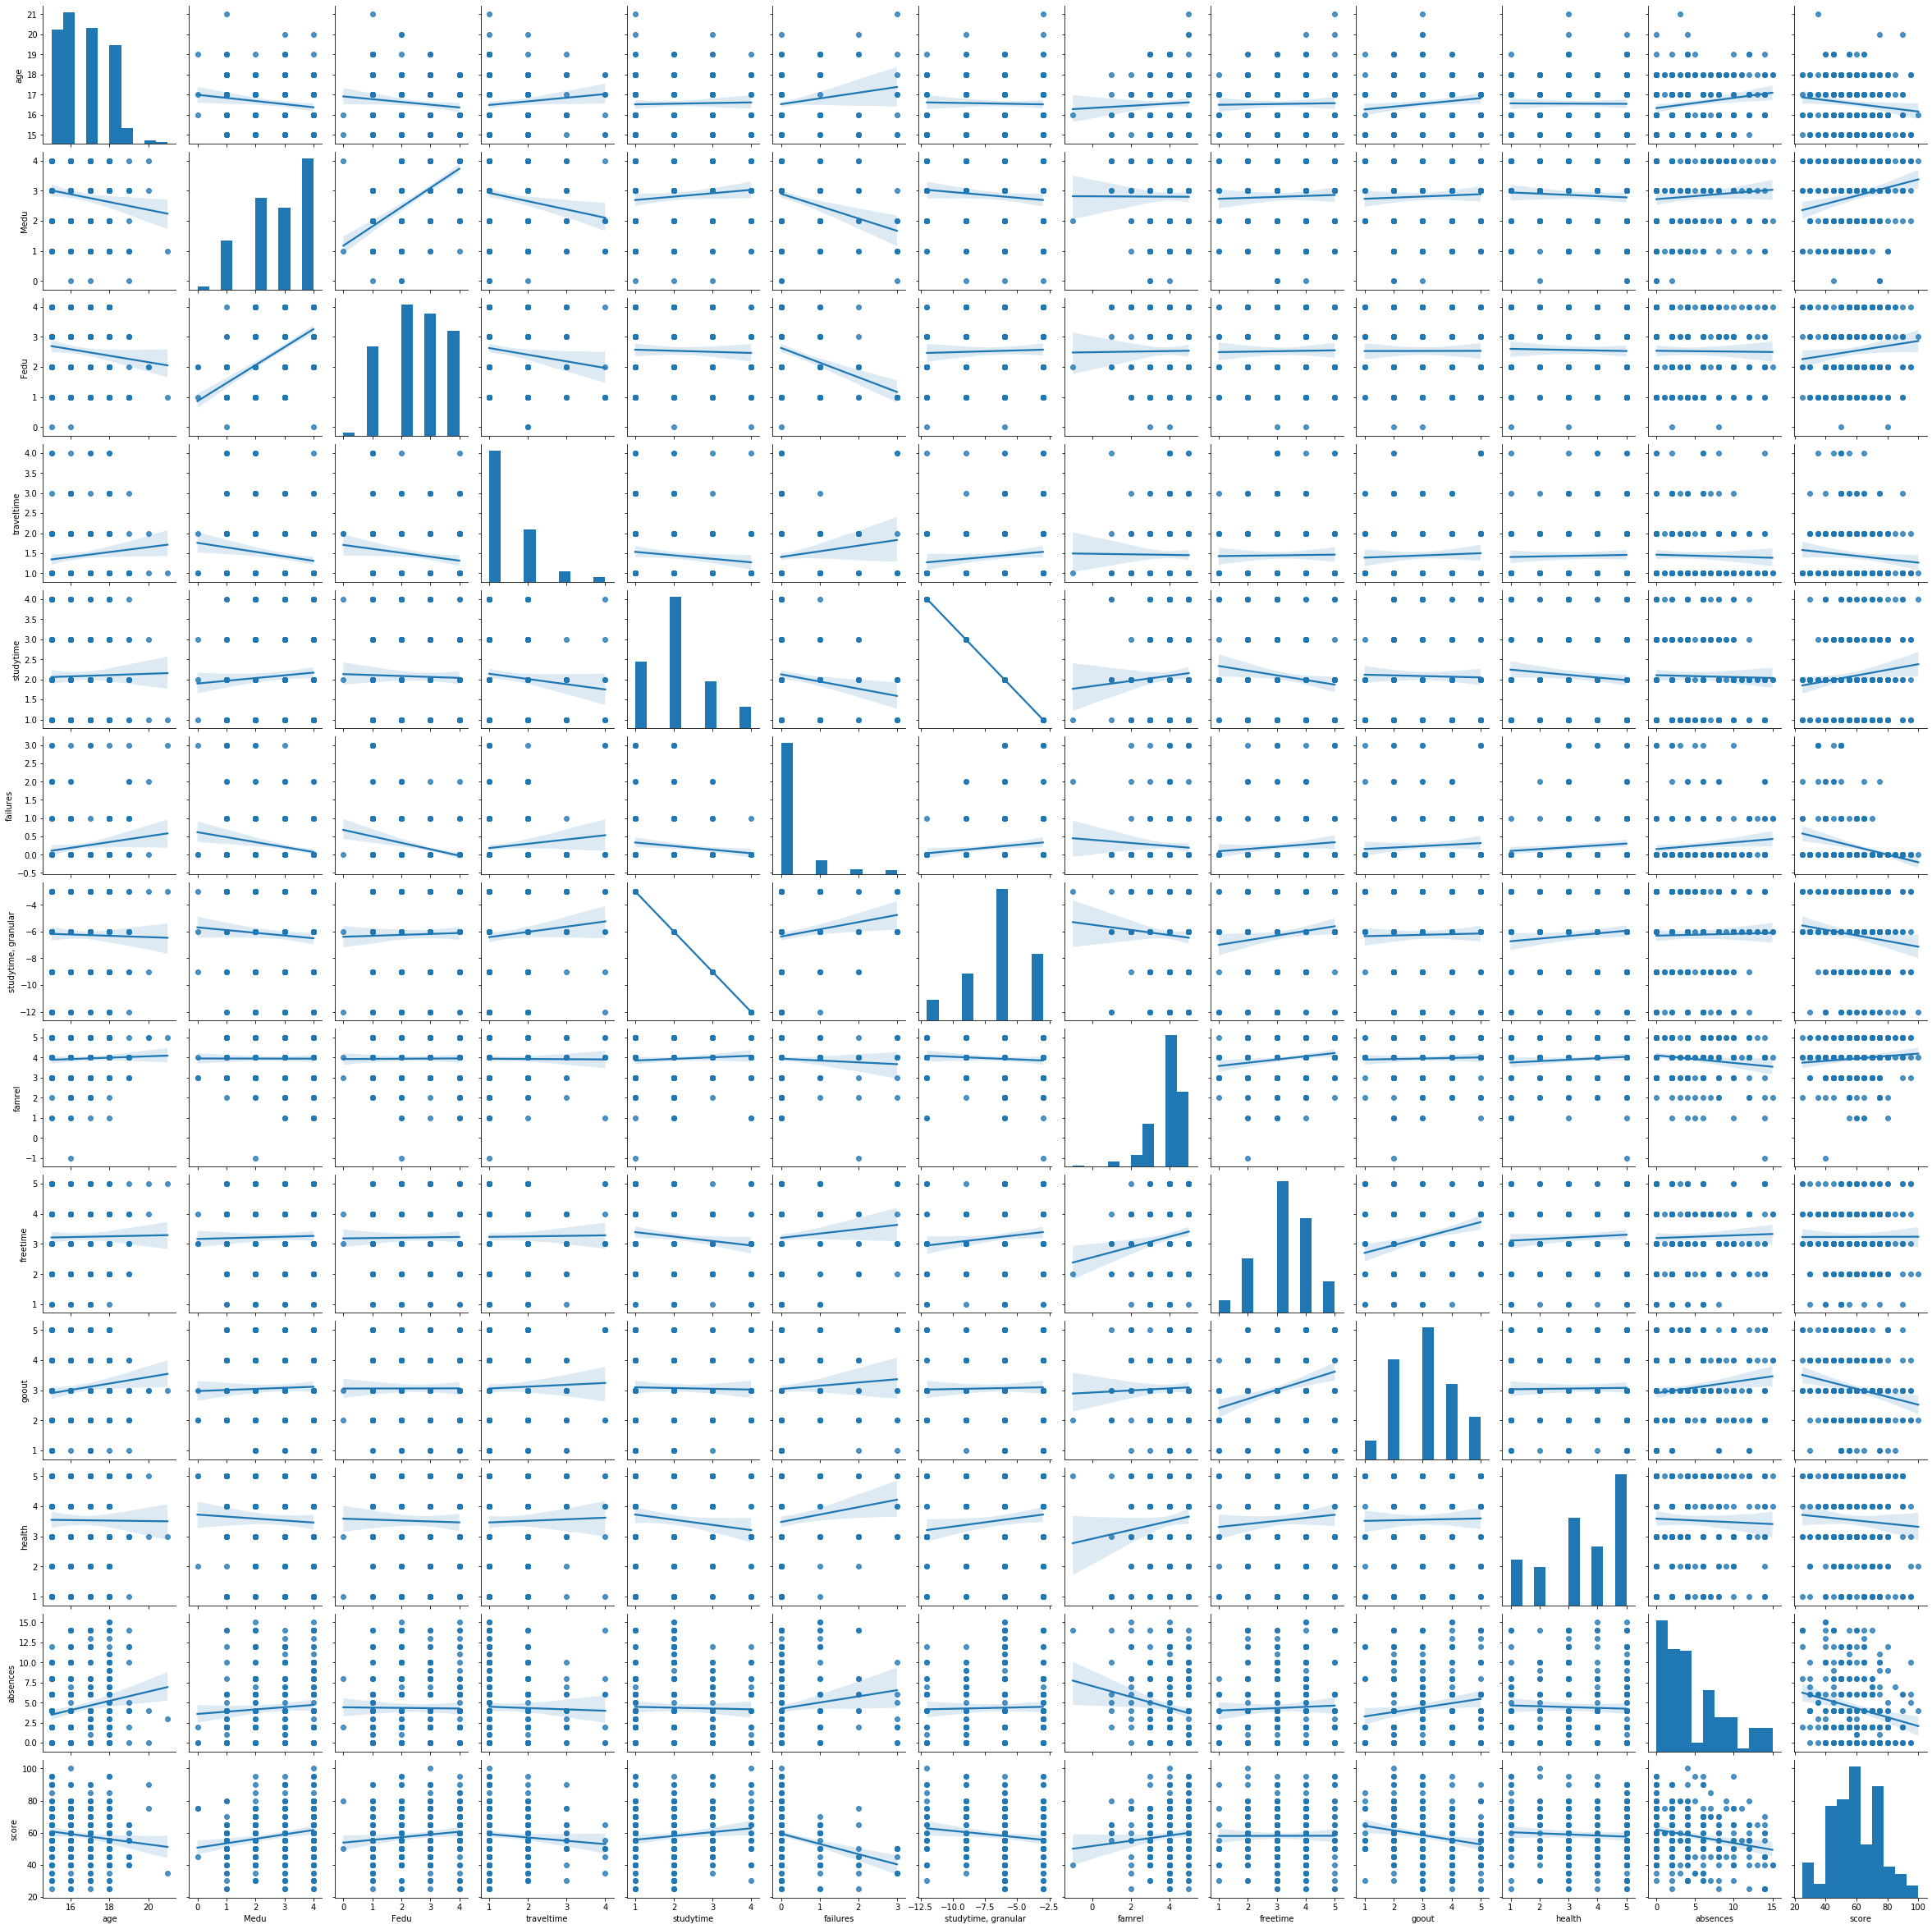

In [212]:
import seaborn as sns
sns.pairplot(stud, kind = 'reg')

In [216]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.141542,-0.120810,0.105365,0.022842,0.150138,-0.022842,0.043890,0.016018,0.121994,-0.006996,0.170914,-0.123024
Medu,-0.141542,1.000000,0.617448,-0.175573,0.087286,-0.235634,-0.087286,-0.002711,0.028426,0.036859,-0.052140,0.076442,0.193514
Fedu,-0.120810,0.617448,1.000000,-0.146643,-0.029121,-0.293133,0.029121,0.008489,0.013415,0.001619,-0.023468,-0.010155,0.116644
traveltime,0.105365,-0.175573,-0.146643,1.000000,-0.106346,0.128112,0.106346,-0.009068,0.012486,0.040879,0.026057,-0.029109,-0.093238
studytime,0.022842,0.087286,-0.029121,-0.106346,1.000000,-0.132705,-1.000000,0.071341,-0.130660,-0.020602,-0.106124,-0.021800,0.129541
failures,0.150138,-0.235634,-0.293133,0.128112,-0.132705,1.000000,0.132705,-0.062447,0.093795,0.065977,0.111353,0.118720,-0.258341
"studytime, granular",-0.022842,-0.087286,0.029121,0.106346,-1.000000,0.132705,1.000000,-0.071341,0.130660,0.020602,0.106124,0.021800,-0.129541
famrel,0.043890,-0.002711,0.008489,-0.009068,0.071341,-0.062447,-0.071341,1.000000,0.165850,0.030823,0.102733,-0.159712,0.099535
freetime,0.016018,0.028426,0.013415,0.012486,-0.130660,0.093795,0.130660,0.165850,1.000000,0.277925,0.070546,0.037266,0.002132
goout,0.121994,0.036859,0.001619,0.040879,-0.020602,0.065977,0.020602,0.030823,0.277925,1.000000,0.015475,0.142733,-0.195214


In [220]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

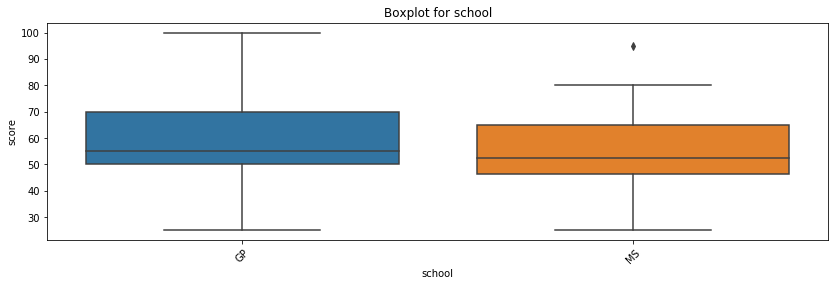

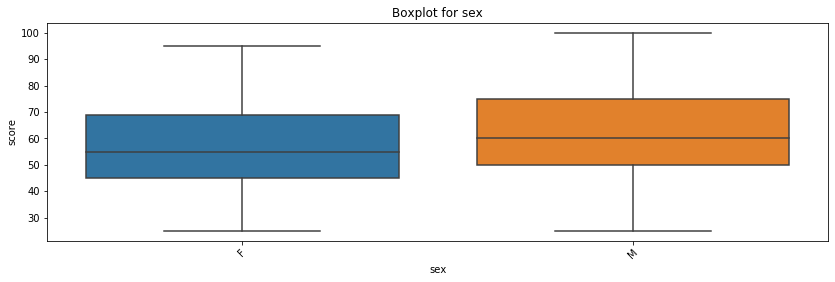

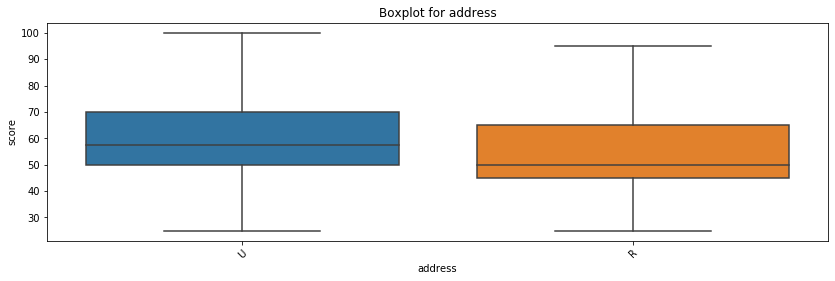

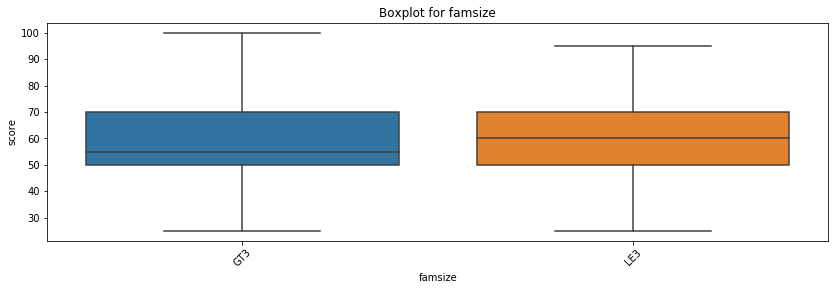

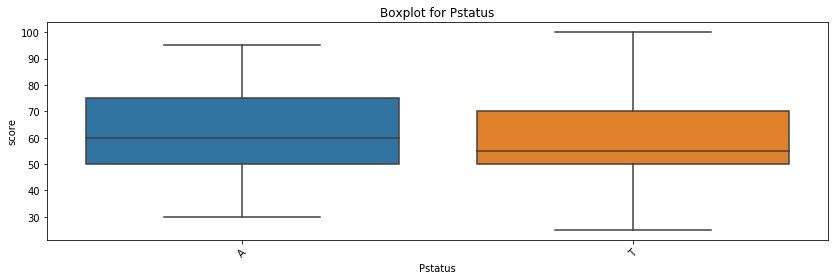

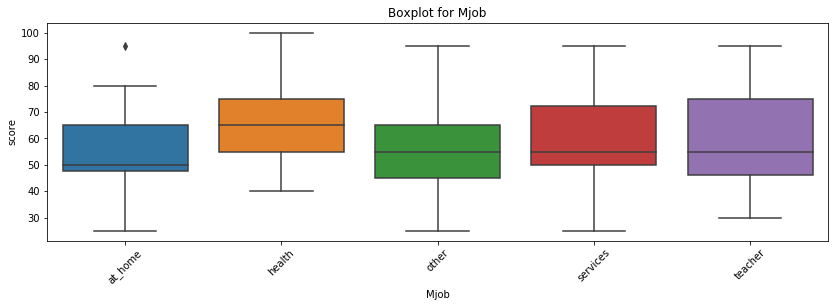

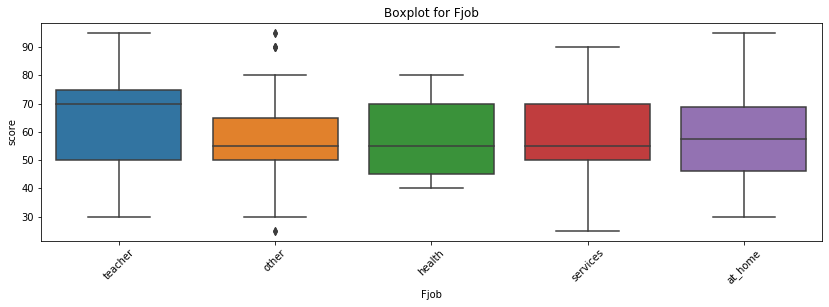

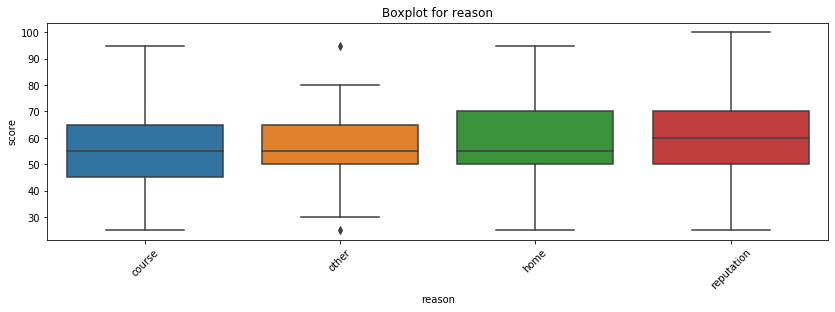

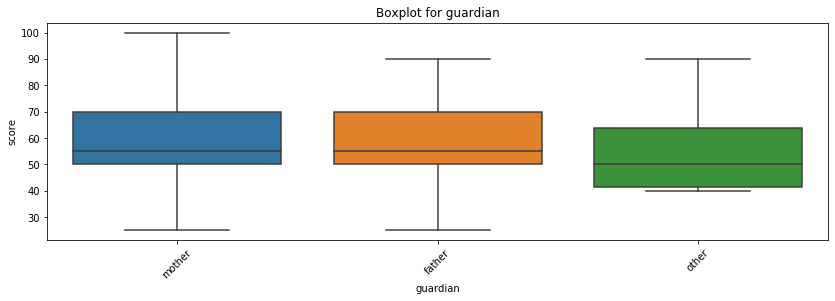

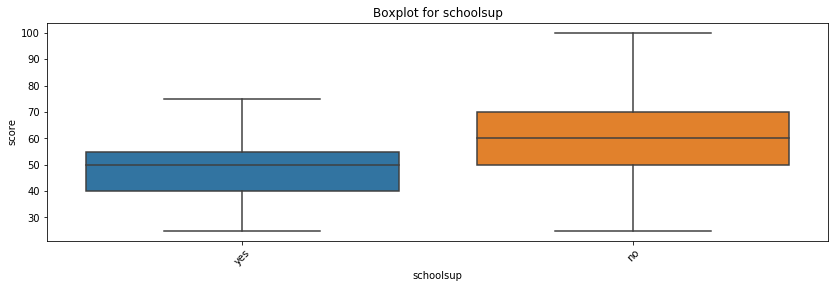

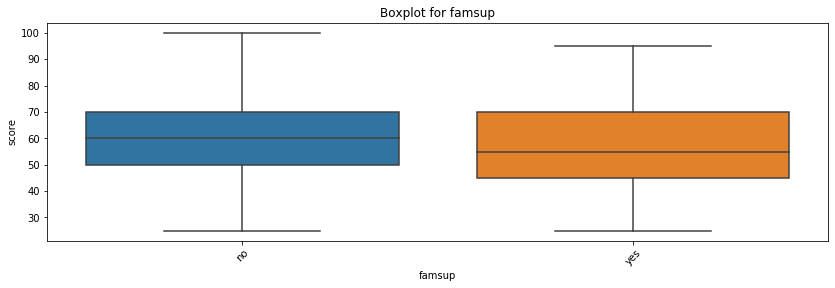

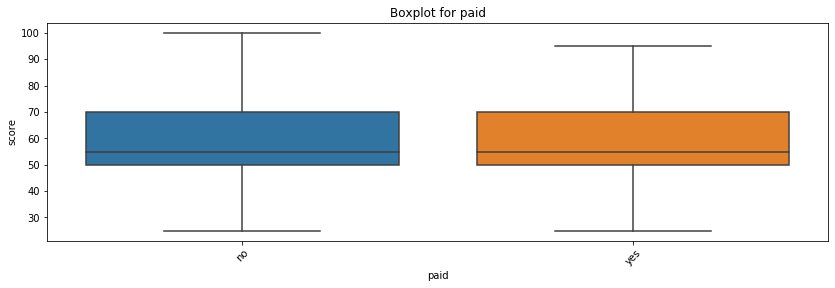

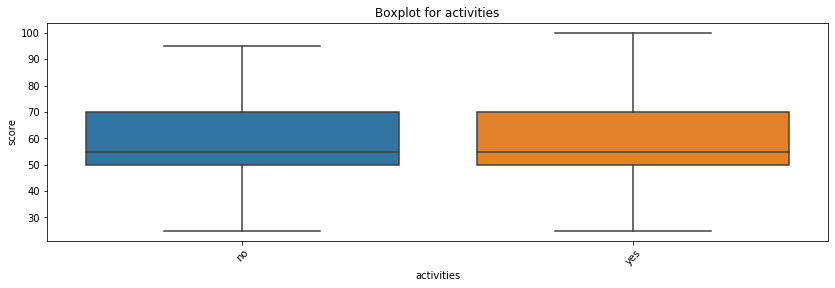

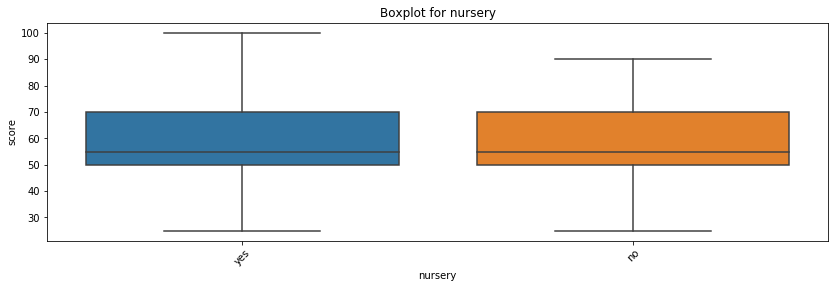

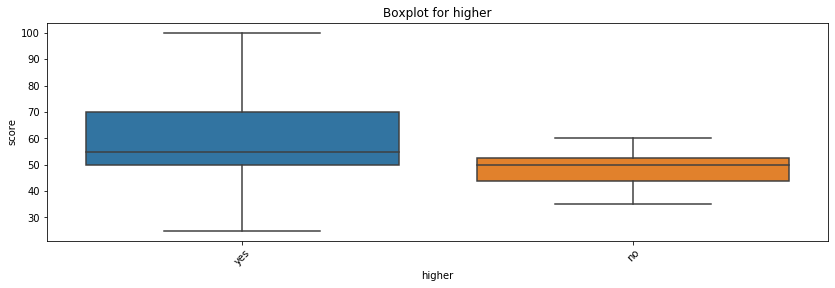

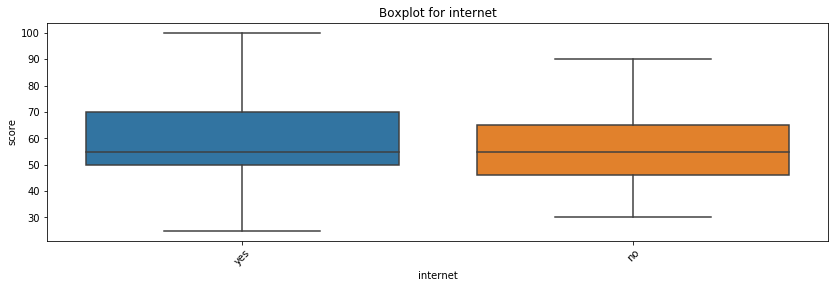

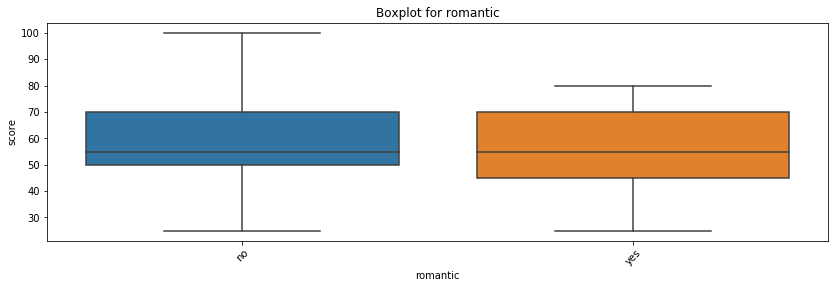

In [221]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)


In [224]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [225]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


In [227]:
#на переменную score больше всего влияют failures и absences, sex, address, Mjob,schoolsup

In [228]:
stud_for_model = stud.loc[:, ['failures', 'absences', 'sex', 'address', 'Mjob', 'schoolsup']]
stud_for_model.head()

,failures,absences,sex,address,Mjob,schoolsup
0,0.0,6.0,F,U,at_home,yes
1,0.0,4.0,F,U,at_home,no
2,3.0,10.0,F,U,at_home,yes
3,0.0,2.0,F,U,health,no
4,0.0,4.0,F,U,other,no


In [ ]:
# Выводы
# из 30 полей - 13 числовых столбцов и 17 текстовых
# 395 строк и 3 поля не содержат нулевые значения (school, sex,age)
# ошибка в поле Fedu (40 вместо 4)
# выбросы в score', 'absences' , что позволяет сделать вывод о том, что данные достаточно чистые.
#переменные fedu и medu скоррелированы на 62%, почти все переменные слабоскоррелированные
#Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'failures', 'absences', 'sex', 'address', 'Mjob', 'schoolsup'